# Visualize diffraction patterns from three circular apertures


In [ ]:
import torch
import torchoptics
import matplotlib.pyplot as plt

from torchoptics import Field, visualize_tensor
from torchoptics.profiles import circle

In [ ]:
circle_shape = (800, 100)  # Number of grid points in each dimension
circle_radius = 200e-6  # Radius of each circle (m)
circle_separation = 2e-3  # Separation between the circles (m)

device = "cuda" if torch.cuda.is_available() else "cpu"

torchoptics.set_default_spacing(10e-6)
torchoptics.set_default_wavelength(700e-9)

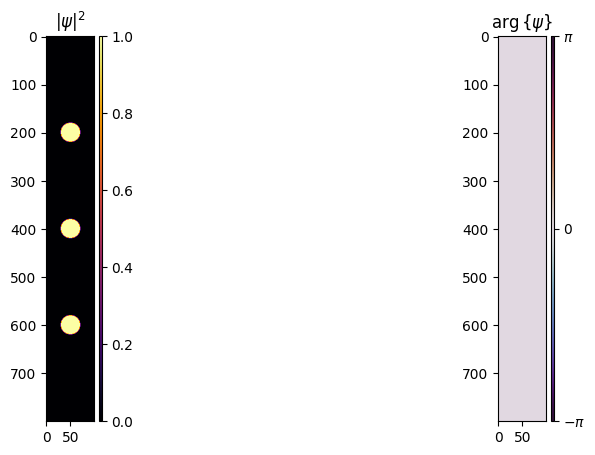

In [ ]:
input_field = Field(
    circle(circle_shape, circle_radius, offset=(-circle_separation, 0))
    + circle(circle_shape, circle_radius, offset=(0, 0))
    + circle(circle_shape, circle_radius, offset=(circle_separation, 0))
)

input_field.visualize()

In [ ]:
z_max = 2  # Maximum propagation distance (m)
z_num = 1000  # Number of propagation steps
propagation_shape = (800, 1)  # Number of grid points in each dimension

propagation_distances = torch.linspace(0, z_max, z_num)  # Propagation distances (m)
intensities = torch.zeros((z_num, propagation_shape[0]), device=device)  # Intensities at each z distance

In [ ]:
# Propagate the input field through the propagation distances
for i, z in enumerate(propagation_distances):
    output_field = input_field.propagate(shape=propagation_shape, z=z)
    intensities[i] = output_field.intensity().flatten()  # Store the intensity

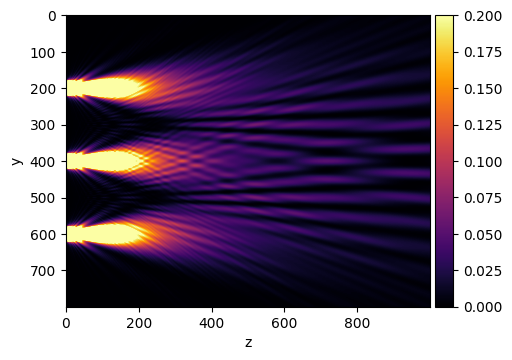

In [ ]:
# Visualize the intensities at each propagation distance
visualize_tensor(intensities.T, xlabel="z", ylabel="y", vmax=0.2)

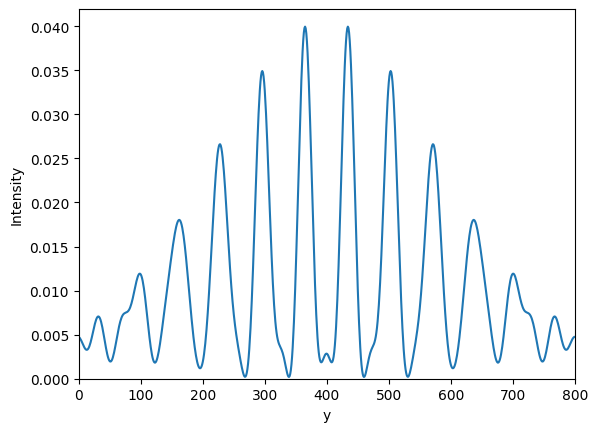

In [ ]:
# Visualize the intensity at z_max
plt.plot(intensities[-1].cpu())
plt.xlabel("y")
plt.ylabel("Intensity")
plt.xlim(0, propagation_shape[0])
plt.ylim(0)
plt.show()